# Thuật toán Gradients descent

## Nhắc lại sơ bộ

Nếu bạn từng học toán ở cấp 3, bạn sẽ quen với hình ảnh này:

<img src="https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/GD/gradient_descent.png?raw=true" style="position: relative; margin-top: 20px; heigh:450px;width:450px; margin-bottom:20px; left:350px">

Trước khi đi tiếp, hãy thống nhất về các thuật ngữ toán học sau:
- Điểm cực tiểu trên đồ thị hàm số gọi là local minimum
- Điểm mà tại đó hàm số đạt giá trị nhỏ nhất gọi là  Global minimum. 

Global minimum là một trường hợp đặc biệt của local minimum.

Từ đồ thị trên, ta thấy Điểm màu xanh lục là điểm local minimum (cực tiểu), và cũng là điểm làm cho hàm số đạt giá trị nhỏ nhất. Đồng thời, ta cũng đúc kết ra những điều đã quá quen thuộc:
 
- Điểm local minimum x∗ của hàm số là điểm có đạo hàm f′(x∗) = 0. Trong lân cận của nó, đạo hàm của các điểm phía bên trái x∗ là không dương, đạo hàm của các điểm phía bên phải x∗ là không âm.

- Đường tiếp tuyến với đồ thị hàm số đó tại 1 điểm bất kỳ có hệ số góc chính bằng đạo hàm của hàm số tại điểm đó.

- Các điểm bên trái của điểm local minimum có đạo hàm âm, các điểm bên phải có đạo hàm dương. 
- Càng xa về phía trái của điểm local minimum thì đạo hàm càng âm, càng xa về phía phải thì đạo hàm càng dương.




## Đặt vấn đề

Trong các bài toán machine learning liên quan tới Linear Regression, chúng ta đã phải cố gắng tìm giá trị nhỏ nhất của hàm chi phí (cost function) mà đôi khi còn gọi là hàm mất mát (loss function) bằng cách tìm những điểm cực trị (thường là điểm cực tiểu).

Điều này có thể thực hiện bằng cách giải phương trình $f'(x) = 0$

Tuy nhiên phương trình trên không phải lúc nào cũng giải được dễ dàng, có những trường hợp việc giải phương trình trên là bất khả thi, ví dụ như $f'(x)=x^2−6sinx$. Vậy khi gặp những tình huống này, chúng ta phải làm gì? May thay, thuật toán Gradient Descent cho chúng ta cách thức tìm các điểm cực tiểu cục bộ này một cách xấp xỉ sau một số vòng lặp. 

Trong thực tế, các giá trị dữ liệu không có đúng 100% mà đôi khi chúng ta chỉ cần những con số gần đúng. Khi một người hỏi tôi, xác suất cho lần đầu tư chứng khoán lần này là 72%, tôi có nên đầu tư không? Thật sự mà nói 72% đã là một con số khá ấn tượng, mọi thứ ngoài đời không bao giờ có 1+1=2 nên những cách tính toán xấp xỉ, gần đúng là một giải pháp tuyệt vời.

## Ý tưởng thuật toán Gradient Descent

Một hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0. 

Điều này giống như tình huống bạn đang ở trên một ngọn núi, bạn muốn xuống được thung lũng một cách nhanh nhất (Ở đây thung lũng chính là những điểm cực tiểu) và cách đơn giản là nhìn xung quanh chỗ nào cảm thấy dốc nhất thì bước xuống từng bước một, cho đến khi bạn không cảm nhận được độ dốc nào nữa thì đấy chính là thung lũng, nơi bằng phẳng và là điểm cực tiểu của đồ thị.

Tuyệt vời phải không, thuật toán Gradient Descent mô tả chính xác những gì bạn đang trải nghiệm ở tình huống trên.

## Gradient Descent cho hàm 1 biến

Quay trở lại hình vẽ ban đầu và một vài quan sát tôi đã nêu. Giả sử xt là điểm ta tìm được sau vòng lặp thứ t. Ta cần tìm một thuật toán để đưa xt về càng gần x∗ càng tốt

**Hàm mất mát - Loss Function**

Để tìm ra phương trình đường thẳng phù hợp với dữ liệu, chúng ta cần tìm ra bộ trọng số  $𝑤_0$ và $w_1$​  tối ưu nhất.

Trước hết, ta giả định sẽ khởi tạo đường thẳng ngẫu nhiên bằng cách cho $w_0$​  và $w_1$ một giá trị ngẫu nhiên. Cũng chính vì đường thẳng được tạo ngẫu nhiên nên khi dự đoán thì kết quả dự đoán sai lệch với giá trị thực tế rất lớn


<img src="https://i.imgur.com/vht4gA3.png" style="position: relative; margin-top: 20px; heigh:450px;width:450px; margin-bottom:20px; left:350px">


$\mathbf{w}_{t+1}^T\mathbf{x}_i = (\mathbf{w}_{t} + y_i\mathbf{x}_i)^T\mathbf{x}_{i} \newline
= \mathbf{w}_{t}^T\mathbf{x}_i + y_i ||\mathbf{x}_i||_2^2$

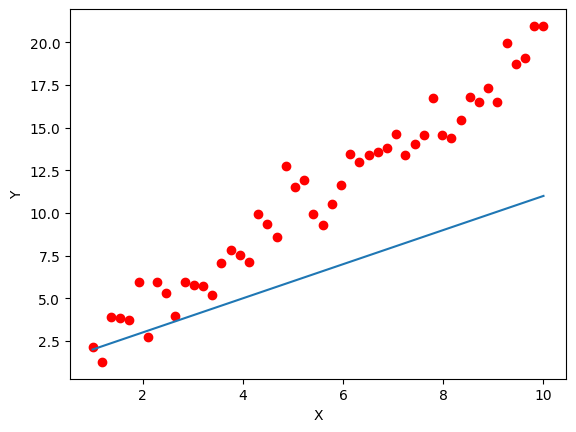

epoch_ 0 :
13.757449242228924  :  inf


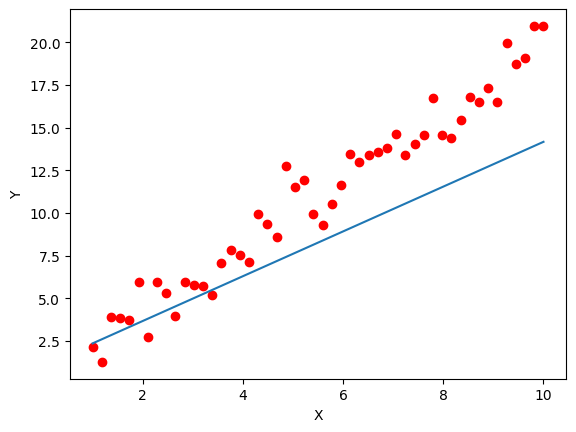

epoch_ 1 :
5.689313575559897  :  13.757449242228924


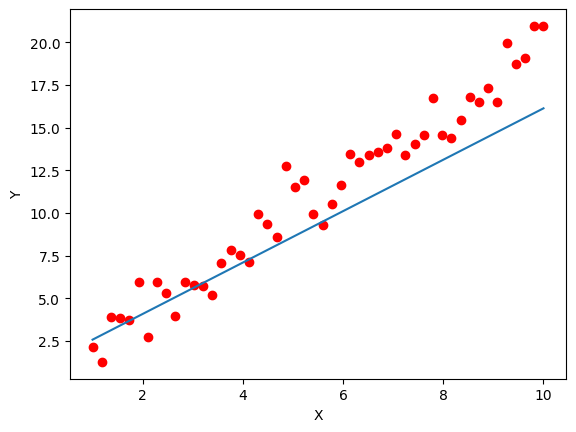

epoch_ 2 :
2.596856671570174  :  5.689313575559897


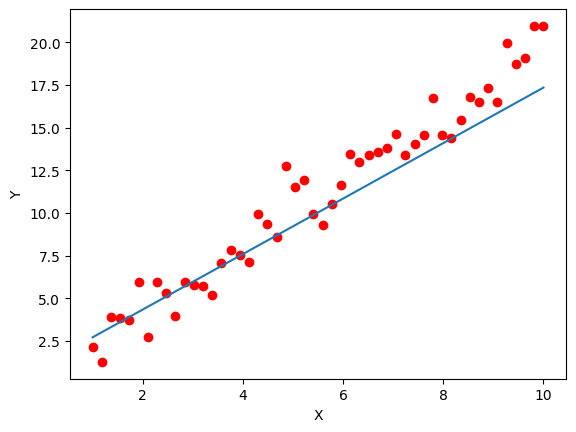

epoch_ 3 :
1.4114365387236623  :  2.596856671570174


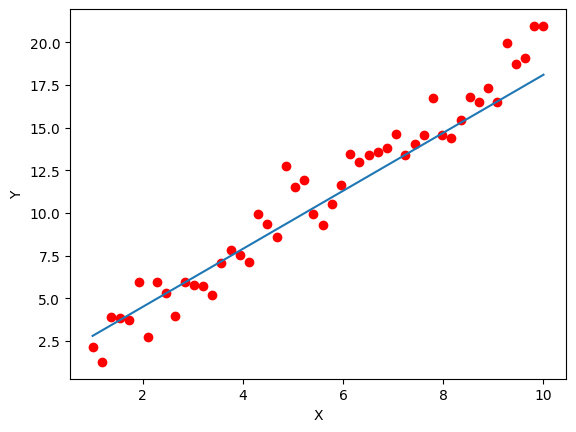

epoch_ 4 :
0.9569299818705617  :  1.4114365387236623


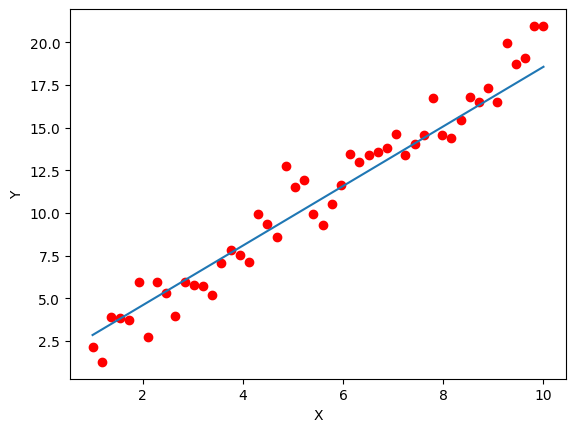

epoch_ 5 :
0.7825624309150402  :  0.9569299818705617


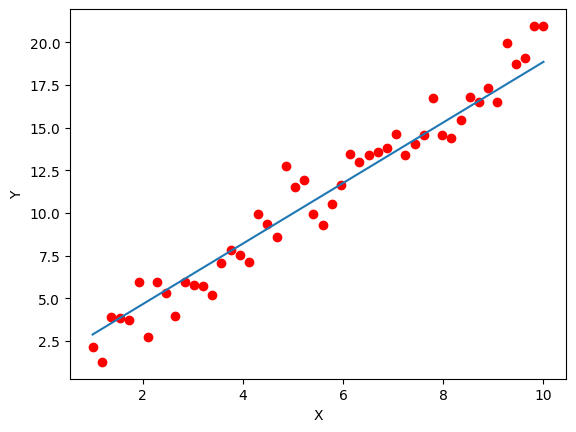

epoch_ 6 :
0.7155648123947307  :  0.7825624309150402


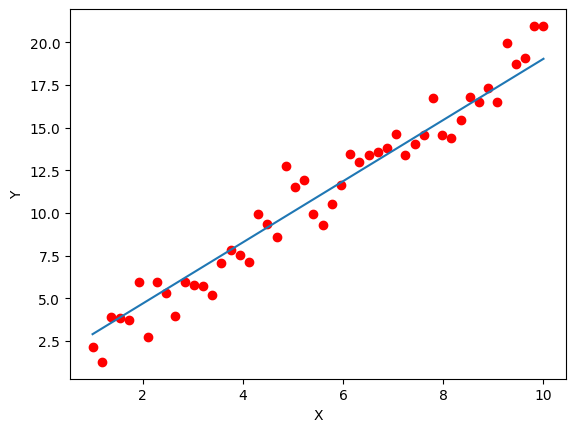

epoch_ 7 :
0.6897196523025556  :  0.7155648123947307


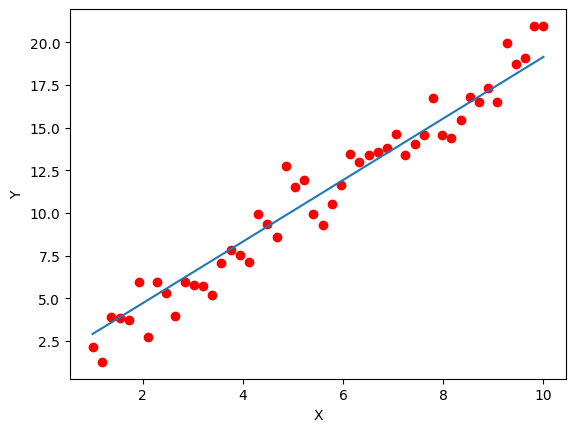

epoch_ 8 :
0.6796476740246622  :  0.6897196523025556


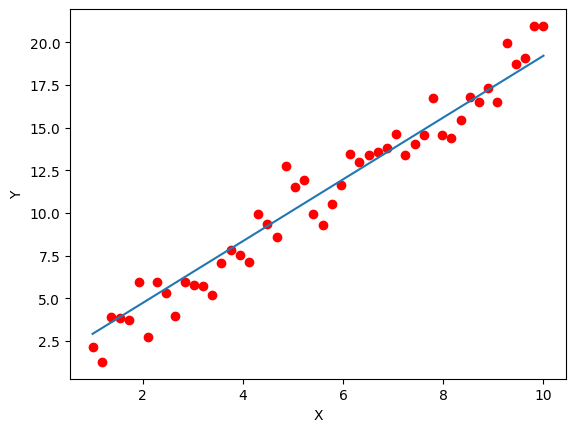

epoch_ 9 :
0.6756217204405083  :  0.6796476740246622


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# linear function f(x) = w_1*x_1 + w_0
def f(x, w):
    return w[0] + w[1] * x

# derivative for loss function
# # Loss = 1/2​n Σ( y^​ −y)**2 
def loss(x, y, w):
    d = 0
    for i in range(len(x)):
        d += (y[i] - (w[0] + w[1] * x[i]))**2
    return d / (2 * len(x))

def derivative(x, y, w):
    d0 = 0
    d1 = 0
    for i in range(len(x)):
        d1 += x[i] * (f(x[i], w) - y[i]) # derivative by w_1
        d0 += f(x[i], w) - y[i]  # derivative by w_0
    return d0 / len(x), d1 / len(x)

# Assuming x and y are defined as numpy arrays of the same length
x = np.linspace(start=1, stop=10, num=50)
y = 2 * x + np.random.normal(0, 1, 50)  # Example linear data with some noise

epoch = 10
learning_rate = 0.01
w = [1, 1]  # Initial guess for the model parameters
los_old = float('inf')  # Initialize as infinity

for i in range(epoch):
    # Plot the data points
    plt.plot(x, y, 'ro')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot the current model
    x0 = np.linspace(start=1, stop=10, num=50) #(0, 10)
    y0 = w[0] + w[1] * x0
    plt.plot(x0, y0)
    plt.show()

    # Update parameters
    los = loss(x, y, w)
    print("epoch_", i, ':')
    print(los, " : ", los_old)

    # If loss has not decreased significantly, stop the training
    if los > (los_old - 0.0001) and i > 0:
        break
    los_old = los

    # Calculate the gradient and update the weights
    a, b = derivative(x, y, w)
    w[0] = w[0] - a * learning_rate
    w[1] = w[1] - b * learning_rate

Rất hay câu hỏi này! Đúng là trong thuật toán Gradient Descent, ta hoàn toàn có thể di chuyển $x_t$ đến vị trí $x_{t+1}$ bằng cách trừ đi bất kỳ một con số nào đó. Tuy nhiên, việc trừ đi $\eta f'(x_t)$ là một lựa chọn đặc biệt giúp đạt được sự hội tụ nhanh nhất đến nghiệm tối ưu của bài toán.

Lý do chính là vì $f'(x_t)$ (đạo hàm của hàm mất mát $f$ tại $x_t$) chỉ ra phương hướng mà $f$ tăng nhanh nhất tại $x_t$. Do đó, để giảm giá trị hàm mất mát $f$ một cách hiệu quả nhất, ta cần di chuyển $x_t$ theo hướng ngược lại với $f'(x_t)$.

Cụ thể hơn, nếu $\hat{x}$ là nghiệm tối ưu (điểm mà $f(\hat{x})$ đạt giá trị nhỏ nhất), thì tại mọi điểm $x_t$ khác $\hat{x*}$, ta luôn có:

$f(x_t) > f(\hat{x*})$

Và $f'(x_t)$ sẽ có hướng hướng về phía tăng giá trị hàm $f$, tức hướng đi ra khỏi $\hat{x}$. Do đó, để di chuyển $x_t$ đến gần $\hat{x}$ hơn, ta cần đi ngược hướng với $f'(x_t)$, tức trừ $f'(x_t)$ vào $x_t$.

Hệ số $\eta$ có tác dụng điều chỉnh bước nhảy, để đạt hiệu quả hội tụ tốt nhất, $\eta$ không nên quá lớn cũng không quá nhỏ.

Source: 
[machinelearningcoban](https://machinelearningcoban.com/2017/01/12/gradientdescent/)

[javatpoint](https://www.javatpoint.com/gradient-descent-in-machine-learning)